In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wine.data')

In [3]:
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [4]:
df.columns = ['class','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
           'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [5]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [6]:
df.shape

(177, 14)

In [7]:
X = df.drop('class', axis = 1)
y = df['class']

In [8]:
y.value_counts()

class
2    71
1    58
3    48
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizacja

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

Normalizacja danych pozwala przeskalować dane, aby ich wartości mieściły się w określonych granicach. Pozwala ujednolicić wartości między różnymi cechami i ich zakresami. 
W kontekście używanych algorytmów w następnym punkcie to w przypadku algorytmu KNeighborsClassifier normalizacja może poprawić działanie i wydajność. Algorytm ten liczy odległości między punktami, więc normalizacja jest ważna. Natomiast RandomForestClassifier nie wymaga tego kroku. Drzewa decyzyjne, na których jest oparty  nie są wrażliwe na skalę wartości. 

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [13]:
knc = KNeighborsClassifier(n_neighbors = 9)
rfc = KNeighborsClassifier()
knc.fit(X_train_normalized, y_train)
rfc.fit(X_train_normalized, y_train)

KNeighborsClassifier()

In [14]:
y_pred_rfc = rfc.predict(X_test_normalized)
y_pred_knc = knc.predict(X_test_normalized)

# Metryki

***accuracy*** - stosunek dobrze wykonanych klasyfikacji i wszystkich klasyfikacji


***precision*** - metryka używana do oceny pozytywnych predykcji i oceny ich jakości. Stosunek dobrze sklasyfikowanych obserwacji do danej klasy i dobrze sklasyfikowane obserwacje do danej klasy + sklasyfikowanych do niej ale niepoprawnie 


***recall*** - metryka pozwalająca ocenić ile obserwaji z danej klasy błędnie do niej nie przypisaliśmy. Stosunek
dobrze sklasyfikowanych obserwacji do danej klasy i dobrze sklasyfikowane obserwacje do danej klasy + obserwacji z tej klasy, które nie zostały do niej przypisane 

***F-measures*** - średnia harmoniczna pomiędzy precision i recall. Metryka pozwalająca uwzględnic dwie poprzednie jednocześnie  

***confusion matrix*** - przedstawia ile obserwacji zostało sklazyfikowanych w jaki sposób. Wiersze reprezentują kolejno klasy do których obserwacje należały, a kolumny te przewidziane 

***classification report*** - zawiera policzone metryki: precision, recall, f1-score, accuracy, macro avg, weighted avg, suppor dla każdej klasy

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [16]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        21
           3       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [17]:
print(classification_report(y_test, y_pred_knc))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.90      0.95        21
           3       0.88      1.00      0.93        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [18]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
cm_knc = confusion_matrix(y_test, y_pred_knc)

Text(0.5, 1.0, 'RandomForestClassifier')

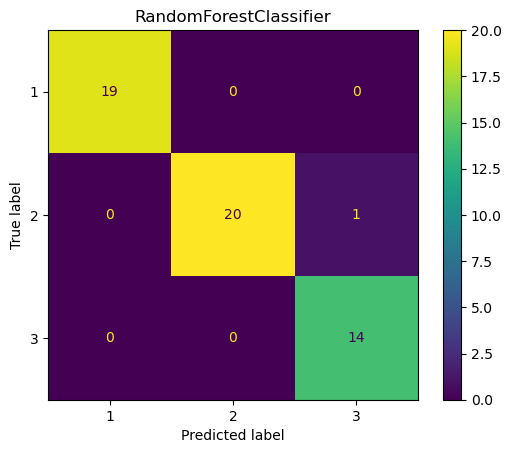

In [19]:
ConfusionMatrixDisplay(cm_rfc, display_labels=rfc.classes_).plot()
plt.title('RandomForestClassifier')

Text(0.5, 1.0, 'KNeighborsClassifier')

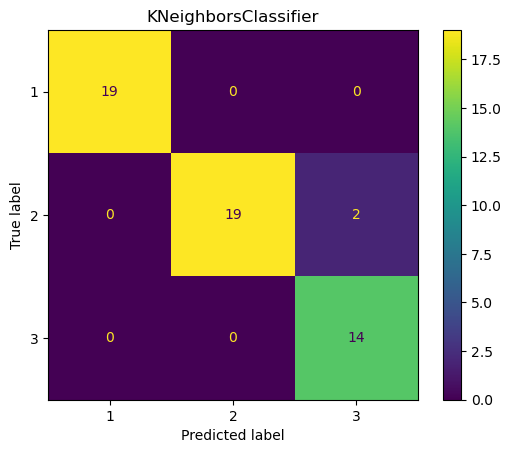

In [20]:
ConfusionMatrixDisplay(cm_knc, display_labels=knc.classes_).plot()
plt.title('KNeighborsClassifier')

Obydwa algorytmy poradziły sobie bardzo dobrze. RFC sklasyfikował niepoprawnie jedną obserwację, a KNN dwie. Obydwa z algorytmów pomyliły się dla obserwacji, które należały do 2 klasy i przewidziały dla niej 3. Dla random forest dokładność to 0.98, a K-Nearest Neighbors 0.96. Obydwa z algorytmów dla klasy 1 uzyskały wszystkie metryki równe 1 co jest oczywiste biorąc pod uwagę gdzie została popełniona pomyłka. 
W przypadku RFC dla klasy 2 otrzymaliśmy precyzję równą 1.0 ( 20-TP zostało podzielone przez 20-TP+ 0 -FP ), a czułość to  0.95 ( 20 -TP zostało podzielone przez TP - 20 + FN-1). Dla klasy 3 precyzja to 0.93 ( 14-TP podzielone przez 14- TP + 1 - FP), a czułość to 1 ( 14 -TP podzielone przez 14-TP + 0 -FN).
Natomiast dla KNN  dla klasy 2 otrzymaliśmy precyzję równą 1.0 ( 19 -TP zostało podzielone przez 19-TP+ 0 -FP ), a czułość to  0.90 ( 19 -TP zostało podzielone przez TP - 19 + FN-2). Dla klasy 3 precyzja to 0.88 ( 14-TP podzielone przez 14- TP + 2 - FP), a czułość to 1 ( 14 -TP podzielone przez 14-TP + 0 -FN).

Analizując metryki lepiej poradził sobie random forest jednak jest to różnica jednej obserwacji, a nasz zbiór był bardzo mały więc przewaga ta nie jest aż tak dominująca. Jeśli miałbym wskazać powód dla którego jednak udało mu się lepiej sklasyfikować to charakter działania algorytmu pozwala na znalezienie wielu wzorców i  ma większe możliwości. 